In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymnet import *

In [2]:
filename = '/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/phase_1_code/data/Synapse/TCGA/RNA_CMS_groups/top500_cms2_names.txt'
with open(filename) as f:
    lines = f.readlines()
    nodenames_CMS2_top_DEA = [line.rstrip() for line in lines]

print(nodenames_CMS2_top_DEA[:100])

['ACE2', 'ADH6', 'STOX1', 'TG', 'CYP2W1', 'DUOX2', 'ABCC2', 'LY6G6D', 'CEL', 'CCL20', 'MYRIP', 'SLC19A3', 'ERP27', 'CELP', 'DUOXA2', 'HUNK', 'SGK2', 'CTTNBP2', 'PRLR', 'TMEM63C', 'POU5F1B', 'NKD1', 'SLC26A2', 'PLCB4', 'C10orf99', 'FHDC1', 'VAV3', 'MEP1A', 'GPD1', 'DDN', 'SLC26A3', 'KRT23', 'SELENBP1', 'CPNE7', 'PTPRD', 'SPINK1', 'FGFR3', 'ABAT', 'XDH', 'A1CF', 'EREG', 'ID1', 'PPP1R14C', 'CDHR1', 'AXIN2', 'NOS2', 'GNG4', 'DDC', 'MIR17HG', 'SLC25A27', 'SULT1B1', 'ATP10B', 'NAALADL2', 'CYP2B6', 'C19orf46', 'LOC730101', 'NR1I2', 'CACNA1D', 'C13orf18', 'SLC5A9', 'TDGF1', 'PPP1R14D', 'CFTR', 'ARID3A', 'HHLA2', 'SYT7', 'CHN2', 'C20orf177', 'ABCC6P1', 'TMC5', 'LRRC19', 'MOGAT3', 'LRRC66', 'AKAP7', 'PFKFB2', 'CCL28', 'C4orf31', 'SP6', 'NAT2', 'POU5F1', 'PAQR8', 'CYP39A1', 'DNAJC6', 'ANO9', 'NCRNA00201', 'LCN2', 'CDHR2', 'ETV4', 'MALAT1', 'RNF157', 'TDGF3', 'SATB2', 'FOXD2', 'GLCE', 'RNF43', 'PANK1', 'PLAGL2', 'HOOK1', 'REEP1', 'NETO2']


In [93]:
# THIS ONE IS JUST GC
filename = '/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/nodenames_CMS2_prior_from500.txt'
with open(filename) as f:
    lines = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    nodenames_CMS2_prior = [x.strip() for x in lines]

# Nodes without prior edges
filename = '/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/nodenames_CMS2_NOprior_from500.txt'
with open(filename) as f:
    lines = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    nodenames_CMS2_NO_prior = [x.strip() for x in lines]

print(f'Of the top {len(nodenames_CMS2_top_DEA)} Differentially Expressed CMS2 (vs CMS4) genes:\n')

print(f'Number of nodes with a Prior: {len(nodenames_CMS2_prior)}, Fraction of total = {len(nodenames_CMS2_prior)/len(nodenames_CMS2_top_DEA)}')
print(f'Number of nodes WITHOUT a Prior: {len(nodenames_CMS2_NO_prior)}, Fraction of total = {len(nodenames_CMS2_NO_prior)/len(nodenames_CMS2_top_DEA)}\n')

print(f'Fraction of top 100 genes that are in the Prior: {len(set(nodenames_CMS2_top_DEA[:100]).intersection(set(nodenames_CMS2_prior)))/100}')
top_100_prior = set(nodenames_CMS2_top_DEA[:100]).intersection(set(nodenames_CMS2_prior))
# write to file
with open('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/top100TEST_prior.txt', 'w') as f:
    for item in top_100_prior:
        f.write("%s\n" % item)
print(f'Fraction of top 100 genes that are NOT in the Prior: {len(set(nodenames_CMS2_top_DEA[:100]).intersection(set(nodenames_CMS2_NO_prior)))/100}\n')

print(f'Fraction of top 50 genes that are in the Prior: {len(set(nodenames_CMS2_top_DEA[:50]).intersection(set(nodenames_CMS2_prior)))/50}')
print(f'Fraction of top 50 genes that are NOT in the Prior: {len(set(nodenames_CMS2_top_DEA[:50]).intersection(set(nodenames_CMS2_NO_prior)))/50}\n')

print(f'Fraction of top 25 genes that are in the Prior: {len(set(nodenames_CMS2_top_DEA[:25]).intersection(set(nodenames_CMS2_prior)))/25}')
print(f'Fraction of top 25 genes that are NOT in the Prior: {len(set(nodenames_CMS2_top_DEA[:25]).intersection(set(nodenames_CMS2_NO_prior)))/25}\n')

print(f'Fraction of top 10 genes that are in the Prior: {len(set(nodenames_CMS2_top_DEA[:10]).intersection(set(nodenames_CMS2_prior)))/10}')
print(f'Fraction of top 10 genes that are NOT in the Prior: {len(set(nodenames_CMS2_top_DEA[:10]).intersection(set(nodenames_CMS2_NO_prior)))/10}\n')

Of the top 500 Differentially Expressed CMS2 (vs CMS4) genes:

Number of nodes with a Prior: 115, Fraction of total = 0.23
Number of nodes WITHOUT a Prior: 337, Fraction of total = 0.674

Fraction of top 100 genes that are in the Prior: 0.15
Fraction of top 100 genes that are NOT in the Prior: 0.71

Fraction of top 50 genes that are in the Prior: 0.18
Fraction of top 50 genes that are NOT in the Prior: 0.64

Fraction of top 25 genes that are in the Prior: 0.12
Fraction of top 25 genes that are NOT in the Prior: 0.68

Fraction of top 10 genes that are in the Prior: 0.2
Fraction of top 10 genes that are NOT in the Prior: 0.7



In [94]:
# check the size of the intersection of nodenames_CMS2_top_DEA[:100] and nodenames_CMS2_prior
print(len(set(nodenames_CMS2_top_DEA[:100]) & set(nodenames_CMS2_prior)))
# check the size of the intersection of nodenames_CMS2_top_DEA[:100] and nodenames_CMS2_NO_prior
print(len(set(nodenames_CMS2_top_DEA[:100]) & set(nodenames_CMS2_NO_prior)))

15
71


In [157]:
# CREATING A BALANCED PRIOR
nodes_with_info = pd.read_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/Top_500_CMS2_WITH_AUX.csv')
nodes_with_info.head(100)

# add column = 'Score' , ['BetweennessCentrality'] + ['Degree'] / max(['Degree'])
nodes_with_info['Score'] = nodes_with_info['BetweennessCentrality'] + nodes_with_info['Degree']/max(nodes_with_info['Degree'])

# sort by Score
nodes_with_info.sort_values(by=['Score'], ascending=False, inplace=True)

KG_highscore_nodes = nodes_with_info.head(500)

# read .txt file containing nodes with prior
filename = '/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/nodenames_CMS2_prior_from500.txt'
with open(filename) as f:
    lines = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    nodenames_CMS2_prior = [x.strip() for x in lines]

gene_number = len(nodenames_CMS2_prior) - 1

# Create a balanced feature selection based on prior and DEA
top_balanced_genes = set()
index = 0
DEA_genes = 0
KG_genes = 0
while len(top_balanced_genes) < gene_number:
    # Add one gene from the top nodenames_CMS2_top_DEA genes if there is space
    if len(top_balanced_genes) < gene_number:
        top_balanced_genes.add(nodenames_CMS2_top_DEA[index])
        DEA_genes += 1
    # Add one gene from the top 'Score' genes if there is space
    if len(top_balanced_genes) < gene_number and index:
        top_balanced_genes.add(nodenames_CMS2_prior[index]) # top_balanced_genes.add(KG_highscore_nodes['commonName'][index])
        KG_genes += 1
    index += 1  # Move to the next index

print(f'Number of DEA genes: {DEA_genes}')
print(f'Number of KG genes: {KG_genes}')

# Convert the set back to a list
top_balanced_genes = list(top_balanced_genes)

# Confirm the length is exactly 100
len(top_balanced_genes)

# write to file
with open('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/CMS2_RNA_balanced_features.txt', 'w') as f:
    for item in top_balanced_genes:
        f.write("%s\n" % item)

Number of DEA genes: 61
Number of KG genes: 59


,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-AA-A01I,2.894527,8.522991,0.851599,7.592781,11.258449,1.383497,3.794114,0.0,2.328406,9.811901,...,9.284678,10.266661,7.867291,9.806727,9.883689,0.000000,9.061741,10.583447,10.240996,10.052761
TCGA-AA-3519,5.555884,9.084554,2.300651,6.942136,12.153080,0.000000,7.028854,0.0,2.300651,10.362483,...,8.981851,10.676424,7.153464,8.846871,9.788783,1.567253,8.670402,12.268857,9.775916,8.930526
TCGA-AA-3517,4.372576,7.396552,1.799668,7.897583,12.100318,1.163950,6.815864,0.0,0.000000,9.936503,...,8.886786,9.679231,7.049997,8.562896,10.514259,1.163950,8.423880,11.747759,10.398354,8.830022
TCGA-AA-3506,5.937031,7.184324,2.444773,7.844235,12.439340,0.000000,7.227750,0.0,0.000000,10.325555,...,7.886036,10.081113,7.093345,8.088052,9.609179,1.688046,7.499846,12.917890,10.536679,8.522255
TCGA-AA-3976,5.131816,7.653645,0.000000,7.539111,11.519635,0.000000,6.342425,0.0,0.000000,9.662599,...,9.326783,9.718565,6.152317,8.844951,9.964053,0.000000,8.863688,11.935190,9.097999,9.732224


In [159]:
# USING BALANCED GENES to index cms2 data

cms2_data_file = '/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/phase_1_code/data/Synapse/TCGA/RNA_CMS_groups/TCGACRC_expression_CMS2.csv'
cms2_data = pd.read_csv(cms2_data_file, index_col=0)

# use top_balaced genes to index the dataframe
cms2_balanced_data = cms2_data.loc[top_balanced_genes]
#transpose the dataframe
cms2_balanced_data = cms2_data.transpose()
cms2_balanced_data.head()

,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-AA-A01I,2.894527,8.522991,0.851599,7.592781,11.258449,1.383497,3.794114,0.0,2.328406,9.811901,...,9.284678,10.266661,7.867291,9.806727,9.883689,0.000000,9.061741,10.583447,10.240996,10.052761
TCGA-AA-3519,5.555884,9.084554,2.300651,6.942136,12.153080,0.000000,7.028854,0.0,2.300651,10.362483,...,8.981851,10.676424,7.153464,8.846871,9.788783,1.567253,8.670402,12.268857,9.775916,8.930526
TCGA-AA-3517,4.372576,7.396552,1.799668,7.897583,12.100318,1.163950,6.815864,0.0,0.000000,9.936503,...,8.886786,9.679231,7.049997,8.562896,10.514259,1.163950,8.423880,11.747759,10.398354,8.830022
TCGA-AA-3506,5.937031,7.184324,2.444773,7.844235,12.439340,0.000000,7.227750,0.0,0.000000,10.325555,...,7.886036,10.081113,7.093345,8.088052,9.609179,1.688046,7.499846,12.917890,10.536679,8.522255
TCGA-AA-3976,5.131816,7.653645,0.000000,7.539111,11.519635,0.000000,6.342425,0.0,0.000000,9.662599,...,9.326783,9.718565,6.152317,8.844951,9.964053,0.000000,8.863688,11.935190,9.097999,9.732224


In [158]:
RNA_CMS2_edges_df = pd.read_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/CMS2_prior_from500.csv')

# Define a function to parse the edge information
def construct_adj(edges_df, nodes):
    # Initialize a 100x100 matrix with zeros
    adjacency_matrix = pd.DataFrame(0, index=nodes, columns=nodes)

    # Iterate over the 'name' column and populate the adjacency matrix
    for edge in edges_df['name']:

        gene1, gene2 = edge.split(' (FI) ')
        # Check if both genes are in the top 100 list before setting the value
        if gene1 in nodes and gene2 in nodes:
            adjacency_matrix.loc[gene1, gene2] = 1
            adjacency_matrix.loc[gene2, gene1] = 1  # Assuming undirected edges
    
    return adjacency_matrix

# Construct the adjacency matrix
adjacency_matrix = construct_adj(RNA_CMS2_edges_df, top_balanced_genes)

# write cms2_balanced_data to file
cms2_balanced_data.to_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/phase_1_code/data/processed_data/CMS2_balanced_data.csv')

# write adjacency_matrix to file
adjacency_matrix.to_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/phase_1_code/data/processed_data/CMS2_balanced_adjacency_matrix.csv')

print(f'edges in prior: {adjacency_matrix.sum().sum() / 2}')
print(top_balanced_genes)
adjacency_matrix

edges in prior: 124.0
['DUOXA2', 'SGK2', 'CEACAM1', 'DEPDC1', 'DNAJC6', 'LOC730101', 'SLC26A3', 'DUOX2', 'GAS2L3', 'GPSM2', 'ARHGAP11B', 'GNG4', 'AXIN2', 'DDN', 'TMEM63C', 'AGT', 'ID1', 'KRT23', 'TDGF1', 'NKD1', 'ABCC2', 'CEP152', 'HMGA2', 'POU5F1B', 'ATP10B', 'CENPF', 'CDK1', 'C13orf18', 'CEP290', 'ACE2', 'HNF4A', 'ATAD5', 'CTTNBP2', 'EREG', 'CSE1L', 'ABAT', 'CCL20', 'MYRIP', 'SLC25A27', 'MIR17HG', 'DDC', 'CASP1', 'CD2AP', 'ERP27', 'PLCB4', 'CENPK', 'GLCE', 'CEL', 'AKAP9', 'CYP2B6', 'STOX1', 'ADH6', 'HMMR', 'AURKA', 'AREG', 'CDC25A', 'A1CF', 'FNBP1L', 'DBF4', 'GARNL3', 'GPC4', 'PRLR', 'NOS2', 'ETV4', 'IQCB1', 'NAALADL2', 'ACSM3', 'TG', 'C10orf99', 'CFTR', 'GPD1', 'MEP1A', 'EPHX2', 'PPP1R14C', 'ACOX2', 'GEN1', 'KIF11', 'VAV3', 'ANKS4B', 'HNF4G', 'ACSL5', 'SLC26A2', 'SPINK1', 'CELP', 'BRCA1', 'SLC19A3', 'FIGNL1', 'DNA2', 'CDC7', 'AHI1', 'CPNE7', 'CDHR1', 'BRIP1', 'LY6G6D', 'HUNK', 'ASPM', 'CYP2W1', 'CCDC18', 'FHDC1', 'CACNA1D', 'SULT1B1', 'DSN1', 'BRCA2', 'SLC5A9', 'C19orf46', 'SELENBP1

,DUOXA2,SGK2,CEACAM1,DEPDC1,DNAJC6,LOC730101,SLC26A3,DUOX2,GAS2L3,GPSM2,...,C19orf46,SELENBP1,E2F5,XDH,PTPRD,NR1I2,CENPE,CEP250,FGFR3,BCL11A
DUOXA2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
SGK2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CEACAM1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEPDC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
DNAJC6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NR1I2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CENPE,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CEP250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FGFR3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### USING ONLY KGRAPH NODES

In [111]:
# Loading nodes
filename = '/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/NODES_RNA_500_CMS2_GC_stragglers.txt'
with open(filename) as f:
    lines = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    nodes_RNA_500_CMS2_GC_stragglers = [x.strip() for x in lines]

# Loading Edges
edges_RNA_500_CMS2_GC_stragglers = pd.read_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/RNA_FI/EDGES_RNA_500_CMS2_GC_stragglers.csv')

# construct RNA adjacency matrix
adjacency_matrix_RNA_500_GC_stragglers = construct_adj(edges_RNA_500_CMS2_GC_stragglers, nodes_RNA_500_CMS2_GC_stragglers)

# Proteomics Part
prot_filename = '/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/PPI/NODES_PROT_500_CMS2_GC.txt'
with open(prot_filename) as f:
    lines = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    nodes_PROT_500_CMS2_GC = [x.strip() for x in lines]

# Loading Edges
edges_PROT_500_CMS2_GC = pd.read_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/Cytoscape_FIViz/PPI/EDGES_PROT_500_CMS2_GC.csv')

# construct PROT adjacency matrix
adjacency_matrix_PROT_500_GC = construct_adj(edges_PROT_500_CMS2_GC, nodes_PROT_500_CMS2_GC)

# check overlap between nodenames_PROT and nodenames_CMS2_top_DEA
# print(f'Number of nodes in nodenames_PROT: {len(nodenames_PROT)}')
# print(f'Number of nodes in nodenames_CMS2_top_DEA: {len(nodenames_CMS2_top_DEA)}')
# print(f'Number of nodes in nodenames_CMS2_prior: {len(nodenames_CMS2_prior)}')
# print(f'Number of nodes in nodenames_CMS2_NO_prior: {len(nodenames_CMS2_NO_prior)}')

common_genes = set(nodes_PROT_500_CMS2_GC).intersection(set(nodes_RNA_500_CMS2_GC_stragglers))

print(f'number of nodenames_PROT that are in nodenames_RNA_500_CMS2_GC_stragglers: {len(common_genes)}')


# # write both matrices to csv
# adjacency_matrix_RNA_500_GC_stragglers.to_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/phase_1_code/Diffusion/adjacency_matrix_RNA_500_GC_stragglers.csv')
# adjacency_matrix_PROT_500_GC.to_csv('/home/celeroid/Documents/CLS_MSc/Thesis/EcoCancer/hNITR/phase_1_code/Diffusion/adjacency_matrix_PROT_500_GC.csv')

number of nodenames_PROT that are in nodenames_RNA_500_CMS2_GC_stragglers: 10


# PYMNET

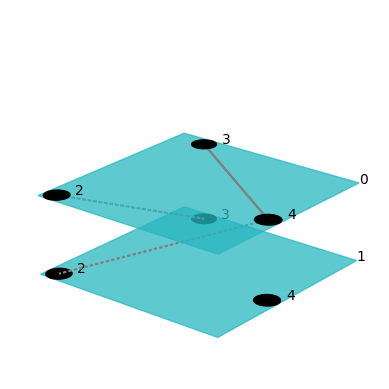

In [142]:
# Pymnet
net = MultilayerNetwork(aspects=1)

net.add_layer('RNA')
net.add_layer('Protein')

# Adding nodes 
for gene in adjacency_matrix_RNA_500_GC_stragglers.columns:
    net.add_node(gene, layer='RNA')
for gene in adjacency_matrix_PROT_500_GC.columns:
    net.add_node(gene, layer='Protein')

# for i in adjacency_matrix_RNA_500_GC_stragglers.columns:
#     for j in adjacency_matrix_RNA_500_GC_stragglers.columns:
#         if adjacency_matrix_RNA_500_GC_stragglers.loc[i, j] == 1:
#             net[i, 'RNA'][j, 'RNA'] = 1

# for i in adjacency_matrix_PROT_500_GC.columns:
#     for j in adjacency_matrix_PROT_500_GC.columns:
#         if adjacency_matrix_PROT_500_GC.loc[i, j] == 1:
#             net[i, 'Protein'][j, 'Protein'] = 1

# for gene in common_genes:
#     net[gene, 'RNA'][gene, 'Protein'] = 1

net = models.er_multilayer(5,2,0.2)

fig = draw(net)

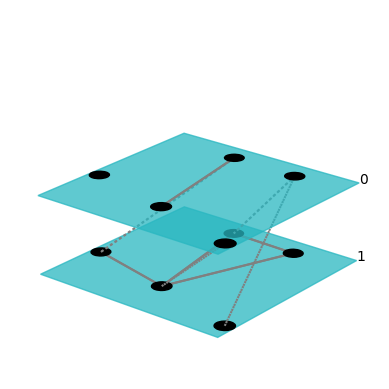

In [137]:
fig = draw(net, nodeLabelRule={})

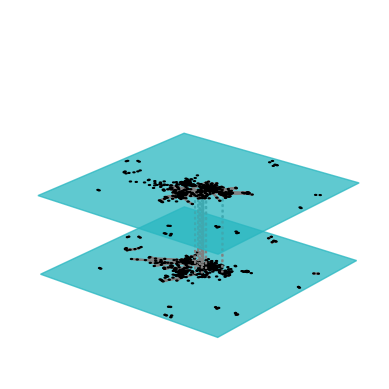

In [129]:
fig=draw(net,
             layout="spring",
             nodeColorDict={(0,0):"r",(1,0):"r",(0,1):"r"},
             layerLabelRule={},
             nodeLabelRule={},
             nodeSizeRule={"rule":"degree","propscale":0.05})